In [12]:
import flopy
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
nmgwmdir_cal = Path('../data/Calibrated')
figdir = Path('../work/figs')
outputdir = Path('../work/output')
# nmgwmdir_uncal = Path('../data/Scenarios/C1/C1-12')
nmgwmdir_uncal = Path('/../data/Scenarios/C1/C1-12')
import config

In [24]:
%%time

m= flopy.modflow.Modflow.load('nm_cali.nam',version='mf2k',verbose=False,check=False,model_ws=nmgwmdir_cal.as_posix())
# m = flopy.modflow.Modflow.load(nmgwmdir_uncal.joinpath('C1-12_copy.nam').as_posix(),version='mf2k',verbose=False,check=False,model_ws=outputdir.joinpath('C1').as_posix())
m.exe_name = config.mf2000exe

CPU times: user 2min 10s, sys: 3.01 s, total: 2min 13s
Wall time: 2min 30s


In [7]:
fheads_withwells = 'nm_cali_withwells.hds'
fheads_wowells = 'nm_cali_nowells.hds'
hdobj_withwells = flopy.utils.binaryfile.HeadFile(nmgwmdir_cal.joinpath(fheads_withwells))
hdobj_wowells = flopy.utils.binaryfile.HeadFile(nmgwmdir_cal.joinpath(fheads_wowells))
data_withwells  =hdobj_withwells.get_alldata()
data_wowells  =hdobj_wowells.get_alldata()

times = hdobj_withwells.get_times()
diff= data_wowells - data_withwells
print('Normalized difference w/ wells vs. w/o wells:',norm(diff)/norm(data_wowells))

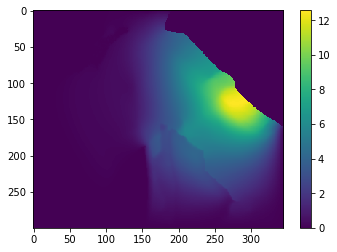

In [23]:
plt.imshow(diff[-1,1,:,:].squeeze())
c = plt.colorbar()
